# Minor Assign 4

1. Write a python program to randomly generate data with 100 numbers and form a histogram of it. Range of numbers should be between 1 to 100(both included), bucket size=10.

(array([12., 12.,  8.,  8., 13.,  9.,  9., 11.,  5., 13.]),
 array([  1.,  11.,  21.,  31.,  41.,  51.,  61.,  71.,  81.,  91., 101.]),
 <BarContainer object of 10 artists>)

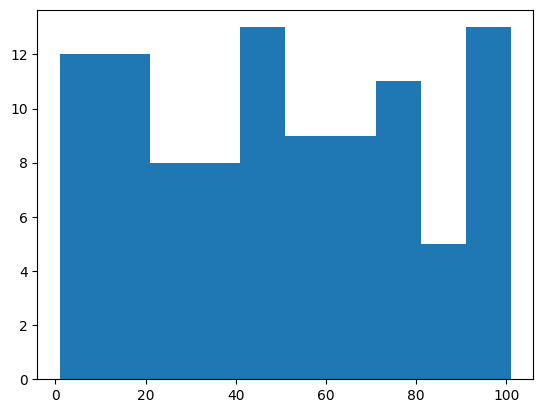

In [14]:

import random

from matplotlib import pyplot

random_100 = [random.randint(1, 101) for _ in range(100)]
pyplot.hist(random_100, bins=10)

2. Write a python program to create a Named Tuple with following details(RollNo.,[Name,Branch,Year of Admission]).

In [17]:
from collections import namedtuple

RollNo = namedtuple('RollNo', ['Name', 'Branch', 'Year_of_Admission'])
R = RollNo('Ashu', 'CSE', 2021)
print(R)

RollNo(Name='Ashu', Branch='CSE', Year_of_Admission=2021)


3. Write a python program to create a Dataclass with following details (Roll No.,[Name,Branch,Year of Admission]).

In [18]:
from dataclasses import dataclass


@dataclass
class RollNo:
    name: str
    branch: str
    year_of_admission: int


roll = RollNo('Ashutosh', 'CSE', 2021)
print(roll)


RollNo(name='Ashutosh', branch='CSE', year_of_admission=2021)


4. Write, execute and visualise the progress of a python code using tqdm module with setting proper description.

In [29]:
from tqdm.notebook import tnrange
from time import sleep

for x in tnrange(100, desc='Loop indicator'):
    print(x)
    sleep(.05)

Loop indicator:   0%|          | 0/100 [00:00<?, ?it/s]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


6. Given below is a confusion matrix, compute Precision, Recall, Accuracy and f1 score.

-----------------| --- | -----
Confusion Matrix | Fit | Unfit
Predict 'Fit'    |  250| 750 
Predict 'Unfit'  |  500| 250
Write a python program using a generic function to compute above given parameters by taking values of TP, FP, TN, FN as user input.

In [27]:
accuracy = lambda tp, tn, fn, fp: (tp + tn) / sum([tp, tn, fn, fp])

precision = lambda tp, tn: tp / (tp + fp)

recall = lambda tp, fp: tp / (tp + fn)


def f1_score(tp, tn, fp):
    p = precision(tp, tn)
    r = recall(tp, fp)
    return 2 * p * r / (p + r)


tp = 250
tn = 250
fp = 750
fn = 500

print(f"{accuracy(tp, tn, fp, fn) = }")
print(f"{precision(tp, tn) = }")
print(f"{recall(tp, fp) = }")
print(f"{f1_score(tp, tn, fp) = }")

accuracy(tp, tn, fp, fn) = 0.2857142857142857
precision(tp, tn) = 0.25
recall(tp, fp) = 0.3333333333333333
f1_score(tp, tn, fp) = 0.28571428571428575


7. Write the python program for k-NN model implemented on iris dataset and print accuracy of the same.

8. What is curse of dimensionality? Write a python program to show it by calculating minimum distances between points when dimensions increase.

Curse of Dimensionality: 100%|██████████| 100/100 [00:08<00:00, 12.16it/s]


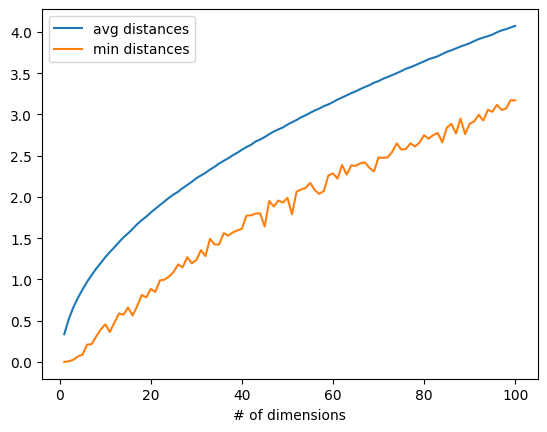

In [31]:
from typing import List
from tqdm import tqdm

Vector = List[float]


def random_point(dim: int) -> Vector:
    return [random.random() for _ in range(dim)]


def random_distances(dim: int, num_pairs: int) -> List[float]:
    return [distance(random_point(dim), random_point(dim)) for _ in range(num_pairs)]


def distance(v1: Vector, v2: Vector) -> float:
    return sum((x1 - x2) ** 2 for x1, x2 in zip(v1, v2)) ** 0.5


dimensions = range(1, 101)
avg_distances = []
min_distances = []

for dim in tqdm(dimensions, desc="Curse of Dimensionality"):
    distances = random_distances(dim, 10000)
    avg_distances.append(sum(distances) / 10000)
    min_distances.append(min(distances))

pyplot.plot(dimensions, avg_distances, label='avg distances')
pyplot.plot(dimensions, min_distances, label='min distances')
pyplot.xlabel('# of dimensions')
pyplot.legend()
pyplot.show()